In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import math

from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
import seaborn as sns

Delta plot total

In [8]:
# --- Call file --- #
report = pd.read_excel('emis_all_fc.xlsx')
# ----------------- #

co2_data = report.loc[report['e']=='NOx']
graph_data = pd.DataFrame(pd.pivot_table(data = report, columns = 'e', index = ['scenario','year'], values = 'Emissions (metric tons)', aggfunc = 'sum', fill_value = 0))
graph_data.reset_index(inplace = True, drop = False)
x_scens = graph_data.scenario.tolist()
emis_styles = pd.read_csv('emis_style.csv')
emis_styles = emis_styles.loc[emis_styles.order.isin(graph_data.columns.tolist())]
graph_data = graph_data[emis_styles.order.tolist()]
co2_data

,e,scenario,year,Emissions (metric tons)
312,NOx,BAU (FC),2010,2.051151e+06
313,NOx,BAU (FC),2015,1.348901e+06
314,NOx,BAU (FC),2020,8.303299e+05
315,NOx,BAU (FC),2023,1.089738e+06
316,NOx,BAU (FC),2026,3.877164e+05
...,...,...,...,...
411,NOx,High Electrification (FC),2038,8.641737e+04
412,NOx,High Electrification (FC),2041,8.665733e+04
413,NOx,High Electrification (FC),2044,8.269386e+04
414,NOx,High Electrification (FC),2047,8.216948e+04


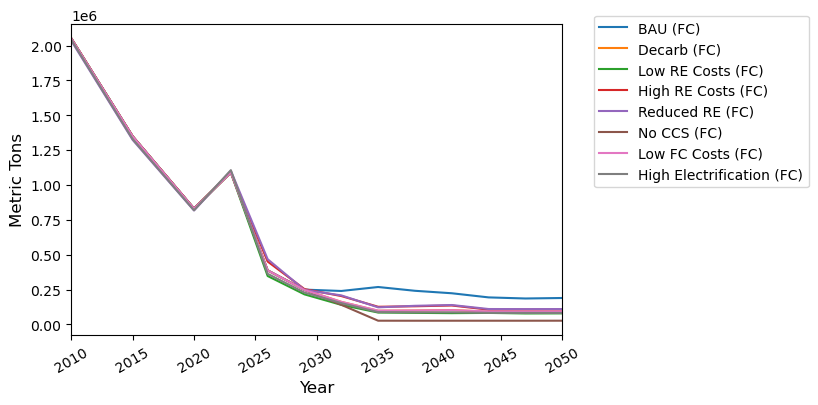

In [9]:
scens = report['scenario'].unique()
plt.figure(figsize=(6,4))
for scen in scens:
    plt.plot(co2_data[co2_data['scenario']==scen]['year'],
             co2_data[co2_data['scenario']==scen]['Emissions (metric tons)'],
             linestyle='-', label=scens)

plt.xlim(2010,2050)
plt.ylabel('Metric Tons', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tight_layout()
plt.xticks(rotation=30)    
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(scens, loc='upper left', bbox_to_anchor=(1.050,1.05), fontsize = 10)

KeyError: 'Other'

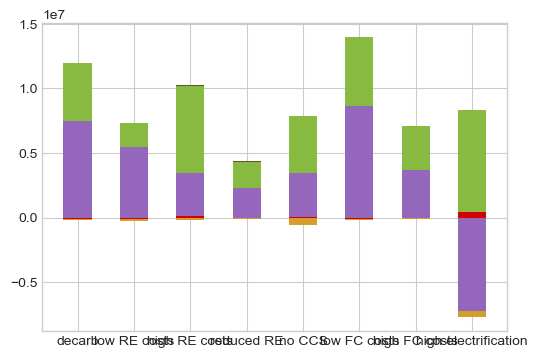

In [3]:
y_categories = emis_styles.order.tolist()

running_sums_pos = [0]*len(x_scens)
running_sums_neg = [0]*len(x_scens)
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(1,1, figsize = (6,4),  sharex = True ) # , layout = 'constrained'

#running_sums = [0]*len(yvals)
emis_sums = [0]*len(y_categories)
for t in range(len(y_categories)):
    yvals = graph_data[y_categories[t]].tolist()
    emis_sums[t] = sum(yvals)
    bottoms = []
    for i in range(len(yvals)):
        if yvals[i] >=0:
            bottoms.append(running_sums_pos[i])
            running_sums_pos[i]+=yvals[i]
        else:
            bottoms.append(running_sums_neg[i])
            running_sums_neg[i]+=yvals[i]
    axs.bar(x_scens,yvals, width = 0.5, bottom = bottoms, color = emis_styles.color.tolist()[t])
    #running_sums = [running_sums[i] + yvals[i] for i in range(len(yvals))]
axs.set_ylabel('[metric tons]')
axs.set_xlabel('Scenario')
plt.xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=90)

keep_emis = []
for t in range(len(emis_sums)):
    if abs(emis_sums[t]) > 1e5:
        keep_emis.append(y_categories[t])
emis_legend = emis_styles.loc[emis_styles.order.isin(keep_emis)]
custom_lines = [Line2D([0], [0], color=x, lw=5) for x in emis_legend.color.tolist()]
axs.legend(custom_lines, emis_legend.order.tolist() ,loc='upper left', bbox_to_anchor=(1.050,1.05), fontsize = 9)

fig.savefig('Differences.png',dpi=150, format='png')

Delta Plot Year 2050

In [15]:
emis_styles = pd.read_csv('emis_style.csv')
report = pd.read_excel('delta_emis.xlsx')
graph_data = pd.DataFrame(pd.pivot_table(data = report.loc[report.year == 2050], columns = 'e', index = 'scenario', values = 'Emissions (metric tons)', aggfunc = 'sum', fill_value = 0))
graph_data.reset_index(inplace = True, drop = False)
x_scens = graph_data.scenario.tolist()
emis_styles = emis_styles.loc[emis_styles.order.isin(graph_data.columns.tolist())]
emis_styles['stack_order'] = list(range(len(emis_styles.order.tolist())))
graph_data = graph_data[emis_styles.order.tolist()]
graph_data

e,CH4,CO2,CO2-eq,NOx,SO2
0,9950.627115,-3.383213e+05,0.000001,-39186.057064,5635.905369
1,16100.134851,-5.474046e+05,0.000003,-36968.466239,4773.204925
2,-2928.577160,9.957162e+04,0.000000,-47792.510960,9868.199349
3,100669.480272,-3.422762e+06,0.000001,-99953.736396,-605.784276
4,4468.324558,-1.519230e+05,0.000001,-39964.021331,5895.214449
5,-50700.929064,1.723832e+06,0.000000,-36068.143843,-683.380784
6,0.000000,0.000000e+00,0.000000,-105291.454771,-486.747490
7,-9303.014555,3.163025e+05,0.000000,-34867.349177,18097.018329


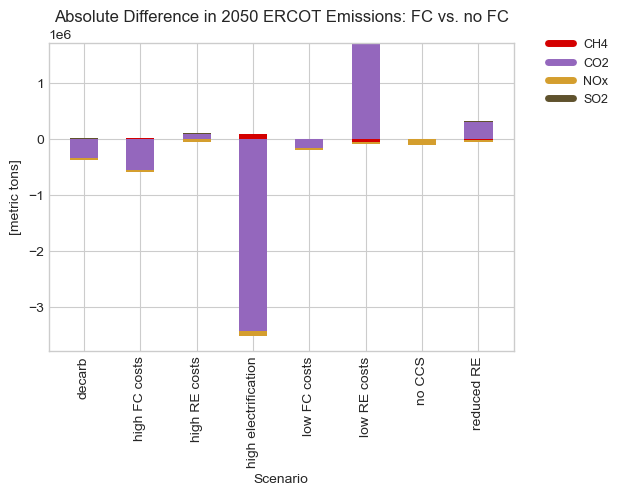

In [16]:
y_categories = emis_styles.order.tolist()

running_sums_pos = [0]*len(x_scens)
running_sums_neg = [0]*len(x_scens)
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(1,1, figsize = (6,4),  sharex = True ) # , layout = 'constrained'

running_sums = [0]*len(yvals)
emis_sums = [0]*len(y_categories)
for t in range(len(y_categories)):
    yvals = graph_data[y_categories[t]].tolist()
    emis_sums[t] = sum(yvals)
    bottoms = []
    for i in range(len(yvals)):
        if yvals[i] >=0:
            bottoms.append(running_sums_pos[i])
            running_sums_pos[i]+=yvals[i]
        else:
            bottoms.append(running_sums_neg[i])
            running_sums_neg[i]+=yvals[i]
    axs.bar(x_scens,yvals, width = 0.5, bottom = bottoms, color = emis_styles.color.tolist()[t])
    running_sums = [running_sums[i] + yvals[i] for i in range(len(yvals))]
axs.set_ylabel('[metric tons]')
axs.set_xlabel('Scenario')
plt.xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=90)
plt.title(label='Absolute Difference in 2050 USA Emissions: FC vs. no FC')

keep_emis = []
for t in range(len(emis_sums)):
    if abs(emis_sums[t]) > 0.5:
        keep_emis.append(y_categories[t])
emis_legend = emis_styles.loc[emis_styles.order.isin(keep_emis)]
custom_lines = [Line2D([0], [0], color=x, lw=5) for x in emis_legend.color.tolist()]
axs.legend(custom_lines, emis_legend.order.tolist() ,loc='upper left', bbox_to_anchor=(1.050,1.05), fontsize = 9)

fig.savefig('Differences.png',dpi=150, format='png')

In [6]:
#keep_years = ['2026','2029','2032','2035','2038','2041','2044','2047','2050']
emis_styles = pd.read_csv('emis_style.csv')
report = pd.read_excel('delta_emis.xlsx')
graph_data = pd.DataFrame(pd.pivot_table(data = report.loc[report.year >= 2026], columns = 'e', index = ['scenario','year'], values = 'Emissions (metric tons)', aggfunc = 'sum', fill_value = 0))
graph_data.reset_index(inplace = True, drop = False)
graph_data['x_id'] = graph_data.scenario+'-'+graph_data.year.astype(str)
x_scens = graph_data.x_id.unique().tolist()
emis_styles = emis_styles.loc[emis_styles.order.isin(graph_data.columns.tolist())]
emis_styles['stack_order'] = list(range(len(emis_styles.order.tolist())))
graph_data = graph_data[emis_styles.order.tolist()]
graph_data

e,ch4,co2,co2e,nox,so2
0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000
3,-0.327921,11.149310,0.0,-1378.269832,-0.067297
4,0.210285,-7.149710,0.0,-1922.558586,0.599774
...,...,...,...,...,...
76,0.176693,-6.007549,0.0,-3188.810627,0.264938
77,-0.598071,20.334435,0.0,-3163.534230,0.226277
78,-421.318383,14324.825038,0.0,-2732.489648,-1.940719
79,-3613.855560,122871.089009,0.0,-1893.924104,-18.404996


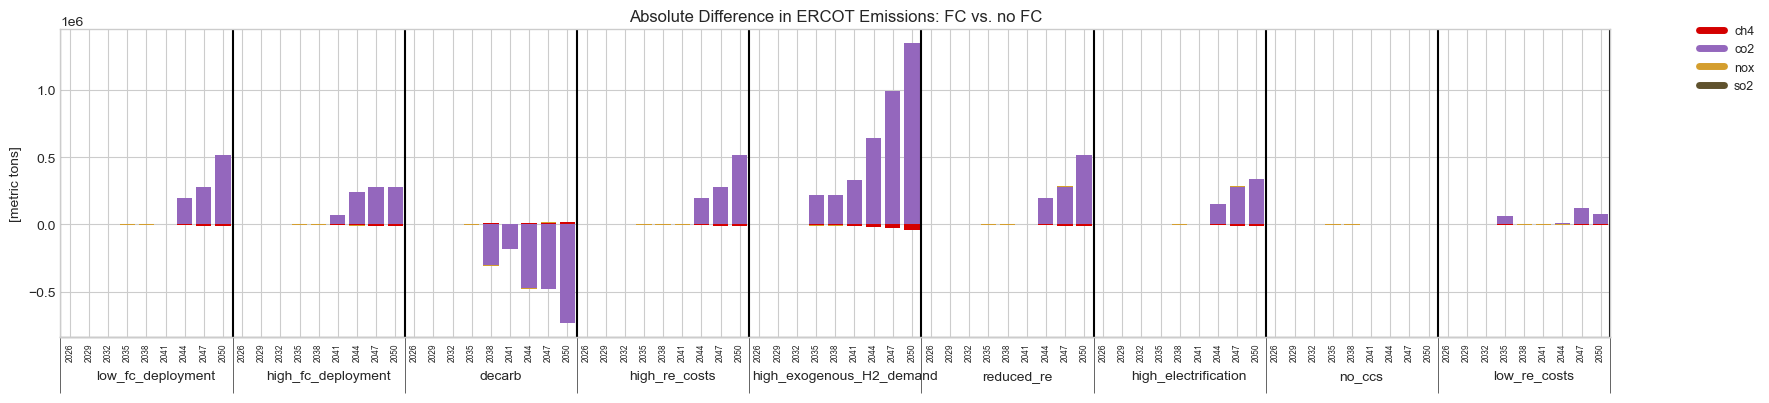

In [7]:
y_categories = emis_styles.order.tolist()

running_sums_pos = [0]*len(x_scens)
running_sums_neg = [0]*len(x_scens)
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(1,1, figsize = (20,4),  sharex = True ) # , layout = 'constrained'

emis_sums = [0]*len(y_categories)
for t in range(len(y_categories)):
    yvals = graph_data[y_categories[t]].tolist()
    emis_sums[t] = sum(yvals)
    bottoms = []
    for i in range(len(yvals)):
        if yvals[i] >=0:
            bottoms.append(running_sums_pos[i])
            running_sums_pos[i]+=yvals[i]
        else:
            bottoms.append(running_sums_neg[i])
            running_sums_neg[i]+=yvals[i]
    axs.bar(x_scens,yvals, width = 0.8, bottom = bottoms, color = emis_styles.color.tolist()[t])
axs.set_ylabel('[metric tons]')
#axs.set_xlabel('Scenario')

yrs = [s.split('-')[1] for s in x_scens]
scen_types = [s.split('-')[0] for s in x_scens]
scen_types = list(set(scen_types))
scen_types = ['\n\n'+s for s in scen_types]

plt.xticks(axs.get_xticks(), yrs, rotation=90, fontsize = 6)
plt.title(label='Absolute Difference in USA Emissions: FC vs. no FC')

yrs_per_s = len(yrs)/len(scen_types)
scen_locs = [yrs_per_s/2 + s*yrs_per_s for s in range(len(scen_types))]

sec = axs.secondary_xaxis(location=0)
sec.set_xticks(scen_locs, labels=scen_types)
sec.tick_params('x', length=0)

sec2 = axs.secondary_xaxis(location=0)
linevalues = [x-0.5 for x in list(range(0,len(x_scens)+1,math.floor(yrs_per_s)))]
sec2.set_xticks(linevalues, labels=[])
sec2.tick_params('x', length=40, width=0.5)

axs.set_xlim(-0.5,len(yrs)-0.5)

keep_emis = []
for t in range(len(emis_sums)):
    if abs(emis_sums[t]) > 0.5:
        keep_emis.append(y_categories[t])
emis_legend = emis_styles.loc[emis_styles.order.isin(keep_emis)]
custom_lines = [Line2D([0], [0], color=x, lw=5) for x in emis_legend.color.tolist()]
axs.legend(custom_lines, emis_legend.order.tolist() ,loc='upper left', bbox_to_anchor=(1.050,1.05), fontsize = 9)

ymin = axs.get_ylim()[0]
ymax = axs.get_ylim()[1]
for x in linevalues:
    axs.vlines(x,ymin,ymax*1.1, colors='black')
axs.set_ylim(ymin,ymax)

fig.savefig('Differences_annual.png',dpi=150, format='png')